### Experiment - 4
### Estimate the precision recall accuracy f-measure of the decision classifier on a breast cancer dataset using 10 fold cross validation


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [3]:
df = pd.read_csv(r"F:\python\archive\data.csv")
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [4]:
df.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype=object)

In [5]:
df.drop(columns = ["id", "Unnamed: 32"], inplace = True)

In [6]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Splitting Dataset

In [7]:
df['diagnosis'] = df['diagnosis'].map({'M' : 1,'B' : 0})
x = df.drop(["diagnosis"], axis = 1)
y = df.diagnosis.values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Feature scaling min-max normalization

X = (X - min(X))/(max(X) - X)

In [10]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
x_train = mmc.fit_transform(x_train)
x_test = mmc.transform(x_test)

### Creating Decision Tree Classifier and Analyzing performance

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Cross Validation Scores

In [12]:
from sklearn.model_selection import cross_val_score
crossValScore = cross_val_score(classifier, x_train , y_train, cv = 10)
print("Cross Validation Scores for cv = 10 : ", list(crossValScore))
print("Accuracy: {:.2f} %".format(crossValScore.mean() * 100))
print("Standard Deviation: {:.2f} %".format(crossValScore.std() * 100))

Cross Validation Scores for cv = 10 :  [0.925, 0.925, 0.825, 0.9, 0.9, 0.95, 0.875, 1.0, 0.9230769230769231, 0.8974358974358975]
Accuracy: 91.21 %
Standard Deviation: 4.37 %


### Confusion Matrix and Classification Report

In [13]:
y_pred = classifier.predict(x_test)
classifier.score(x_test, y_test)

0.935672514619883

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       108
           1       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



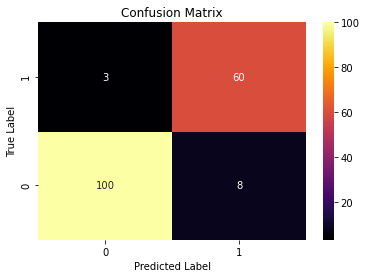

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
ax.set_ylim([0,2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [15]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("True Positives: ", TP)
print("False Positives: ", FP)
print("True Negatives: ", TN)
print("False Positives: ", FN)

True Positives:  60
False Positives:  8
True Negatives:  100
False Positives:  3


In [16]:
precision = TP/(TP + FP)
recall = TP/(TP + FN)
f_measure = (2 * precision * recall) / (precision + recall)
print("Precision: ", precision)
print("Recall: ", recall)
print("F-Measure: ", f_measure)

Precision:  0.8823529411764706
Recall:  0.9523809523809523
F-Measure:  0.916030534351145
